In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.decomposition import NMF, PCA

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.cluster import DBSCAN

from sklearn import (
    cluster, decomposition, ensemble, manifold, 
    random_projection, preprocessing)
from imblearn.over_sampling import SMOTE


In [10]:
df = pd.read_csv('../sample_df.csv')

In [11]:
df

,funny,wow,text,publication_id,rating,article_id,id,sad,disagree,likes,parent_id,created
0,0,0,I still do not understand why Donna Lynn is ru...,102,1,387552,6142937,0,0,0,0,2017-10-13
1,0,0,I have a solution for how we treat indigenous ...,54,1,324293,5092410,0,0,10,0,2017-04-04
2,1,0,"It sounds like a compact SUV (a real SUV, not ...",54,1,371420,5870632,0,0,0,1,2017-08-30
3,0,0,The dishonesty in the piece is breath-taking. ...,105,1,375069,5995251,0,0,0,0,2017-09-21
4,0,0,"Apparently, political theory is following econ...",22,1,79547,320108,0,0,1,0,2016-05-19
...,...,...,...,...,...,...,...,...,...,...,...,...
120416,0,0,The bishops who have befriended D. Trump are n...,53,1,159282,776426,0,0,19,0,2017-01-01
120417,6,0,I wonder if Burke has to pay a baggage fee jus...,53,1,163809,891846,0,2,2,1,2017-01-24
120418,0,0,Yep.,13,1,325467,5110372,1,0,2,0,2017-04-08
120419,0,0,Then live your life accordingly. Nobody is sto...,13,1,316143,1067753,0,0,0,1,2017-03-02


In [12]:
X2 = df.pop('text').values
# y = sample_df.likes.values
y = df.pop('disagree').values
X = df.values

# VECTORIZE TEXT COLUMN

In [8]:
snowball = SnowballStemmer(language = 'english')
port = PorterStemmer()
def tokenize(doc):
    '''
    INPUT: string
    OUTPUT: list of strings

    Tokenize and stem/lemmatize the document.
    '''
    return [port.stem(w) for w in word_tokenize(doc.lower())]

stop = list(stopwords.words('english'))
# stop.extend(''.split())
# stop_words = set(stop)

In [39]:
vectorizer = TfidfVectorizer(max_features=100, stop_words='english', analyzer='word', strip_accents='ascii',sublinear_tf = True)
vect = vectorizer.fit_transform(X2)

In [40]:
features = vectorizer.get_feature_names()
np.unique(features)

array(['actually', 'agree', 'alaska', 'american', 'article', 'away',
       'bad', 'believe', 'best', 'better', 'big', 'business', 'canada',
       'care', 'change', 'city', 'come', 'country', 'day', 'did', 'didn',
       'does', 'doesn', 'doing', 'don', 'fact', 'far', 'free', 'going',
       'good', 'got', 'government', 'great', 'health', 'help', 'isn',
       'job', 'just', 'know', 'law', 'left', 'let', 'life', 'like',
       'little', 'll', 'long', 'look', 'lot', 'make', 'man', 'maybe',
       'money', 'need', 'needs', 'new', 'news', 'obama', 'oil', 'old',
       'party', 'pay', 'people', 'person', 'point', 'political',
       'president', 'problem', 'public', 'read', 'real', 'really',
       'right', 'said', 'say', 'state', 'stop', 'support', 'sure', 'tax',
       'thing', 'things', 'think', 'time', 'trump', 'use', 'used', 've',
       'vote', 'want', 'way', 'white', 'women', 'won', 'work', 'world',
       'wrong', 'year', 'years', 'yes'], dtype='<U10')

In [ ]:
#classes are not weighted correctly, so start by weighting the disagree classifier


## Try NMF

In [36]:
nmf = NMF(n_components=10, init = 'random')
nmf.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init='random', l1_ratio=0.0, max_iter=200,
    n_components=10, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [39]:
H = nmf.components_
H_top_index = H.argsort()[:,-1:-11:-1]

In [47]:
toks1 = []
toks2 = []
toks3 = []
toks4 = []
for i in range(10):
    toks1.append(features[H_top_index[0][i]])
    toks2.append(features[H_top_index[1][i]])
    toks3.append(features[H_top_index[2][i]])
    toks4.append(features[H_top_index[3][i]])

## TRY PCA

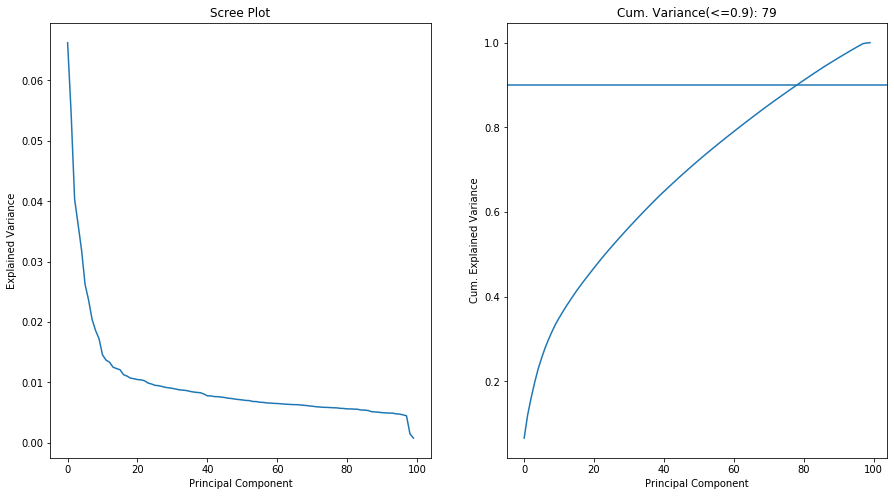

In [57]:
pca = PCA()
X_pca = pca.fit_transform(vect)

fig,axs = plt.subplots(1,2, figsize=(15,8))
cut_off = 0.9
axs[0].plot(pca.explained_variance_ratio_)
axs[1].plot(np.cumsum(pca.explained_variance_ratio_))
axs[1].axhline(0.9, 0, 100)
axs[0].set_xlabel('Principal Component')
axs[0].set_ylabel('Explained Variance')
axs[1].set_xlabel('Principal Component')
axs[1].set_ylabel('Cum. Explained Variance')
axs[0].set_title('Scree Plot')
axs[1].set_title(f'Cum. Variance(<=0.9): {np.min(np.where(np.cumsum(pca.explained_variance_ratio_)>=cut_off))}')
# plt.savefig("pca_scree.png")

## Try DBSCAN TO CLUSTER

In [ ]:
dbs = DBSCAN(eps = 1.2, min_samples= 400)
dbs.fit(vect)

In [ ]:
labels = dbs.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

In [7]:
#lets create a bag of words...
# tokenized = [word_tokenize(c.lower()) for c in X]

In [9]:
# stop = set(stopwords.words('english'))
# docs = [[word for word in words if word not in stop]
#         for words in tokenized]



In [10]:

# docs_porter = [[porter.stem(word) for word in words]
#                for words in docs]
# docs_snowball = [[snowball.stem(word) for word in words]
#                  for words in docs]
# docs_wordnet = [[wordnet.lemmatize(word) for word in words]
#                 for words in docs]

## Begin Prediction

In [29]:
# y = y.values
# cols = ['funny', 'wow', 'rating', 'sad', 'disagree', 'parent_id', 'created_time']
# new_X = np.concatenate((X, vect), axis = 1)


In [25]:
# sk_test_neg_rmses = cross_val_score(model, X_test, y_test, scoring='neg_root_mean_squared_error')
# sk_test_rmse = np.mean(sk_test_neg_rmses)*(-1)
vect.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(vect.todense(), y, random_state = 1, test_size = 0.25)

In [27]:
# scaler = preprocessing.StandardScaler()
# scaler.fit_transform(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)


In [44]:
model = RandomForestRegressor(n_jobs=-1, max_depth=3)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
y_pred = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)


(0.29578095911510804, -0.004086117462098082)

In [52]:
r2_scores_likes = {'RfR':[( 0.32281089920805434, 0.010802814746672107),(0.8530864685178404, 0.027899605757146784)]}
r2_scores_disagrees = {'RFR':[((0.07185531523805766, 0.011444331978920363))]}

## OTHER MODELS

In [74]:
# lin_model = sm.OLS(y_train, X_train, hasconst=True)

# orig_results = lin_model.fit()

In [65]:
# y_hat = orig_results.predict(X_test)
from sklearn.linear_model import ElasticNet

In [72]:
regr = ElasticNet(random_state=0, alpha = 0.5)
regr.fit(X_train, y_train)
y_hat = regr.predict(X_test)



In [73]:
regr.score(X_train, y_train), regr.score(X_test, y_test)


(0.003907158312615011, 0.004729066155799044)